Descrição do projeto
Este projeto se concentra na previsão da doença hepática gordurosa não alcoólica (DHGNA) com base em dados clínicos. A iniciativa utiliza técnicas estatísticas e de aprendizado de máquina para avaliar os fatores de risco associados à DHGNA, bem como prever sua ocorrência em indivíduos.
Autor
•	Jesuíno A.A. de Souza
Resumo
As informações aqui apresentadas fazem parte de um estudo voltado à compreensão da doença hepática gordurosa não alcoólica (DHGNA), uma condição em que o fígado acumula excesso de gordura, comumente observada em pessoas com sobrepeso ou obesidade. Embora aparentemente inofensiva, a DHGNA pode evoluir para condições mais graves, como a esteato-hepatite não alcoólica (NASH), que representa um risco significativo de danos ao fígado.
O objetivo deste projeto é analisar dados clínicos e identificar padrões que possam ajudar a compreender a progressão da DHGNA. Fatores como idade, peso e gênero são avaliados para entender sua influência no desenvolvimento da condição ao longo do tempo. A análise desses dados tem o potencial de fornecer insights valiosos que, futuramente, podem contribuir para tratamentos e intervenções mais eficazes para pacientes que enfrentam esse problema.

Atributos
Este conjunto de dados contém informações sobre indivíduos envolvidos em um estudo focado na doença hepática gordurosa não alcoólica (DHGNA). Abaixo está a descrição detalhada dos atributos:

ID: Um número único atribuído a cada participante do estudo, usado para rastrear os indivíduos e seus dados durante a pesquisa.

Idade: Indica quantos anos cada participante tinha no momento de entrada no estudo. A idade é um fator importante na compreensão da progressão de condições de saúde ao longo do tempo.

Gênero: Define se o participante é homem ou mulher (0 = feminino, 1 = masculino). Essa informação demográfica é fundamental, já que algumas condições de saúde podem afetar os gêneros de maneira diferente.

Peso: O peso corporal do participante em quilogramas (kg). Esses dados são coletados para analisar a relação entre peso e a evolução ou progressão da DHGNA.

Altura: Medida da altura do participante em centímetros (cm). Usada, em combinação com o peso, para calcular o Índice de Massa Corporal (IMC).

IMC (Índice de Massa Corporal): Um valor calculado com base no peso e na altura do participante, usado para avaliar se o peso está dentro de uma faixa saudável. IMCs mais altos frequentemente se associam a maiores riscos de problemas de saúde, como a DHGNA.

ID do caso: Identificador único relacionado a casos específicos de DHGNA associados a cada participante. Permite a análise das características individuais e sua ligação com a progressão da doença.

Futime: Tempo decorrido desde o início do estudo até um evento específico (por exemplo, a morte do participante ou o último acompanhamento).

Status: Mostra a condição do participante ao final do estudo (0 = vivo no último acompanhamento, 1 = morto). Ajuda os pesquisadores a avaliar o impacto da DHGNA e fatores relacionados na mortalidade.

Data Exploration
!pip install matplotlib seaborn pandas numpy


In [3]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 28.6 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 36.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 31.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 45.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 54.8 MB/s eta 0:00:00


In [5]:
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 47.1 MB/s eta 0:00:00a 0:00:01


In [8]:
# import most essential libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import numpy as np 
%matplotlib inline

In [11]:
# Importar a biblioteca pandas
import pandas as pd

# Caminho para o arquivo CSV
df = pd.read_csv("/home/jesuino/Projeto-MAS-25/data/nafld1.csv")

# Exibir as primeiras linhas do DataFrame
print("Primeiras linhas do DataFrame:")
print(df.head())

Primeiras linhas do DataFrame:
   Unnamed: 0  id  age  male  weight  height        bmi  case.id  futime  \
0        3631   1   57     0    60.0   163.0  22.690939  10630.0    6261   
1        8458   2   67     0    70.4   168.0  24.884028  14817.0     624   
2        6298   3   53     1   105.8   186.0  30.453537      3.0    1783   
3       15398   4   56     1   109.3   170.0  37.830100   6628.0    3143   
4       13261   5   68     1     NaN     NaN        NaN   1871.0    1836   

   status  
0       0  
1       0  
2       0  
3       0  
4       1  


In [13]:
print(df.head())

   Unnamed: 0  id  age  male  weight  height        bmi  case.id  futime  \
0        3631   1   57     0    60.0   163.0  22.690939  10630.0    6261   
1        8458   2   67     0    70.4   168.0  24.884028  14817.0     624   
2        6298   3   53     1   105.8   186.0  30.453537      3.0    1783   
3       15398   4   56     1   109.3   170.0  37.830100   6628.0    3143   
4       13261   5   68     1     NaN     NaN        NaN   1871.0    1836   

   status  
0       0  
1       0  
2       0  
3       0  
4       1  


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17549 entries, 0 to 17548
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  17549 non-null  int64  
 1   id          17549 non-null  int64  
 2   age         17549 non-null  int64  
 3   male        17549 non-null  int64  
 4   weight      12763 non-null  float64
 5   height      14381 non-null  float64
 6   bmi         12588 non-null  float64
 7   case.id     17518 non-null  float64
 8   futime      17549 non-null  int64  
 9   status      17549 non-null  int64  
dtypes: float64(4), int64(6)
memory usage: 1.3 MB


Há 17549 instâncias no datatset. O atributo weight tem apenas 12763 instâncias. O atributo height tem apenas 14381 instâncias. O atributo bmi tem apenas 12588 instâncias.

Todos os atributos são numéricos.

In [15]:
df.describe()

,Unnamed: 0,id,age,male,weight,height,bmi,case.id,futime,status
count,17549.000000,17549.000000,17549.000000,17549.000000,12763.000000,14381.000000,12588.000000,17518.000000,17549.000000,17549.000000
mean,8780.106046,8784.215967,52.659639,0.467320,86.353350,169.434949,30.073865,8840.924478,2410.600547,0.077725
std,5070.539328,5070.970712,14.722515,0.498945,22.239458,10.141421,7.085435,5051.334075,1573.017638,0.267746
min,1.000000,1.000000,18.000000,0.000000,33.400000,123.000000,9.207332,3.000000,7.000000,0.000000
25%,4389.000000,4393.000000,42.000000,0.000000,70.000000,162.000000,25.136434,4598.000000,1132.000000,0.000000
50%,8778.000000,8786.000000,53.000000,0.000000,83.900000,169.000000,28.875884,8781.000000,2148.000000,0.000000
75%,13171.000000,13175.000000,63.000000,1.000000,99.200000,177.000000,33.710372,13249.000000,3353.000000,0.000000
max,17566.000000,17566.000000,98.000000,1.000000,181.700000,215.000000,84.395725,17563.000000,7268.000000,1.000000


O paciente médio tem 52,7 anos, pesa 86,35 kg e tem altura de 169,43 cm.

In [16]:
df.shape

(17549, 10)

(17549, 10)

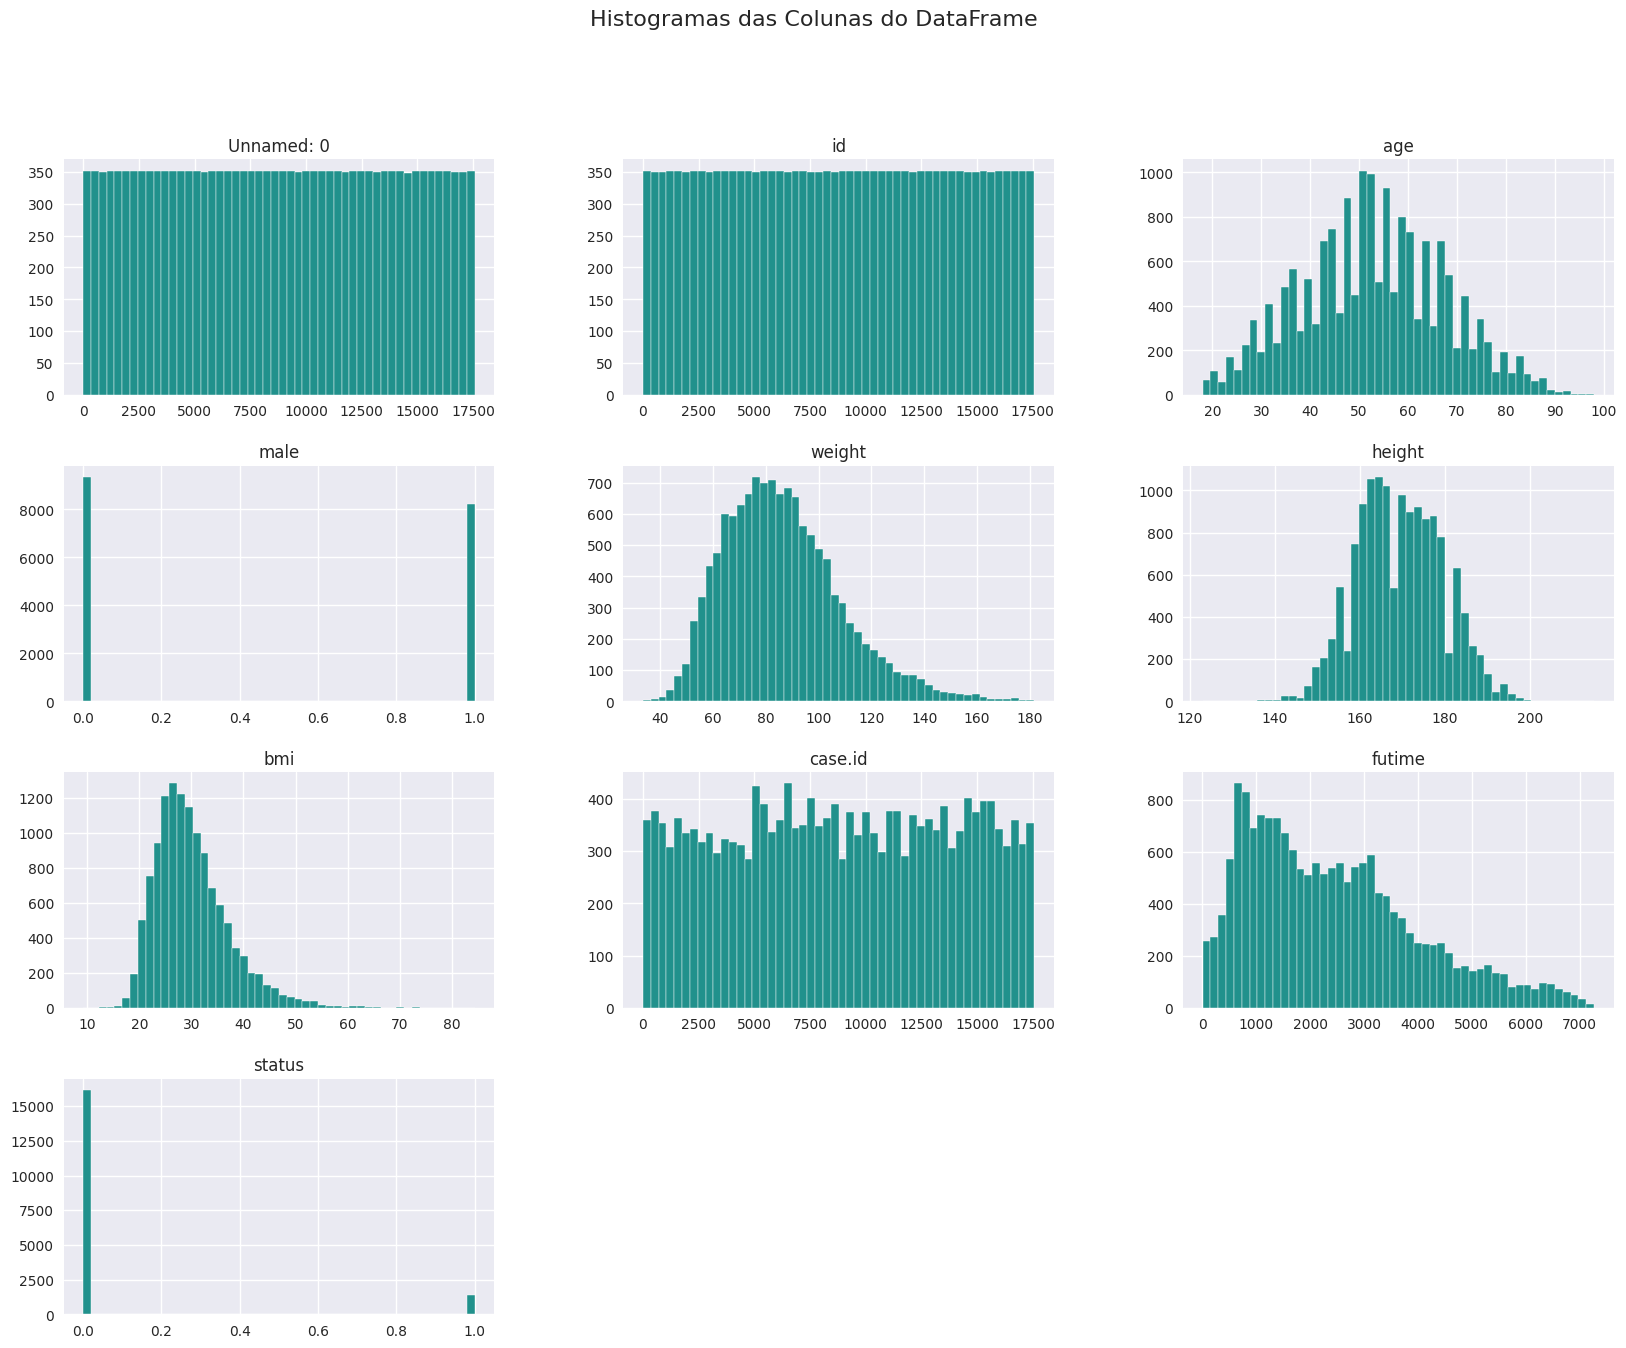

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar a paleta de cores Viridis
plt.style.use('seaborn-v0_8')
colormap = plt.cm.viridis

# Criar histogramas para cada coluna
df.hist(bins=50, figsize=(20, 15), color=colormap(0.5))  # Cor Viridis aplicada
plt.suptitle("Histogramas das Colunas do DataFrame", fontsize=16)
plt.show()

Inferências:
Os atributos masculino e status são atributos categóricos e binários.
Os atributos têm escalas muito diferentes. Os valores para idade variam de 20 a 100. Os valores para altura variam de 120 a 200. Os valores para peso variam de 40 a 180. Os valores para IMC variam de 15 a 55. Discutiremos isso mais tarde neste caderno quando explorarmos a escala de recursos.
Alguns dos histogramas se estendem muito mais para a direita da mediana do que para a esquerda. É um pouco mais difícil para algoritmos de aprendizado de máquina detectar padrões. Transformaremos esses atributos para ter distribuições mais em forma de sino.

In [18]:
# Soma os valores ausentes em cada coluna
missing_values = df.isna().sum()
print("Valores ausentes por coluna:")
print(missing_values)

Valores ausentes por coluna:
Unnamed: 0       0
id               0
age              0
male             0
weight        4786
height        3168
bmi           4961
case.id         31
futime           0
status           0
dtype: int64


In [19]:
# Calcular a porcentagem de valores ausentes por coluna
percent_missing = df.isnull().sum() / len(df) * 100

# Exibir os resultados com uma mensagem clara
print("Porcentagem de valores ausentes por coluna:")
print(percent_missing)

Porcentagem de valores ausentes por coluna:
Unnamed: 0     0.000000
id             0.000000
age            0.000000
male           0.000000
weight        27.272209
height        18.052311
bmi           28.269417
case.id        0.176648
futime         0.000000
status         0.000000
dtype: float64


Visualização de dados
Número de homens e mulheres cujos dados sobre fígado gorduroso estão armazenados no conjunto de dados

In [20]:
df.male.value_counts()

male
0    9348
1    8201
Name: count, dtype: int64

Existem 8.201 pacientes do sexo masculino e 9.348 do sexo feminino no conjunto de dados.

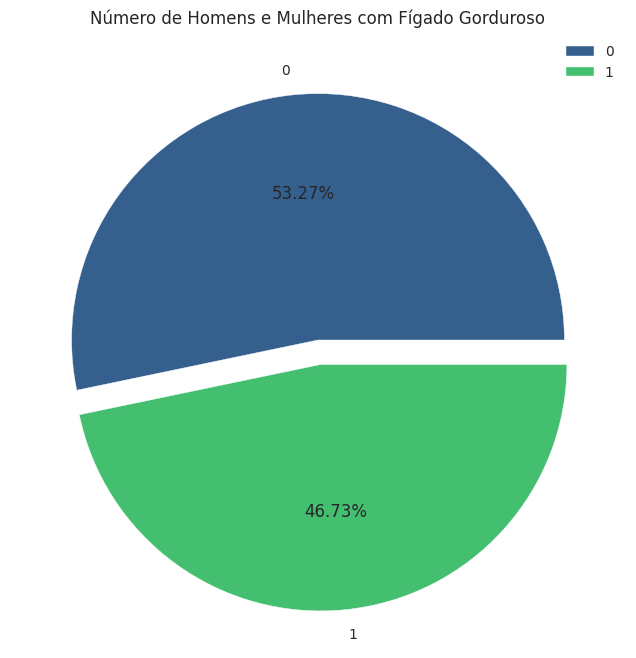

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar a paleta Viridis
colormap = plt.cm.viridis

# Criar o gráfico de pizza para os valores únicos na coluna "male"
df["male"].value_counts(dropna=False).plot(
    kind="pie",
    title="Número de Homens e Mulheres com Fígado Gorduroso",
    autopct='%1.2f%%',  # Mostrar porcentagens no gráfico
    explode=(0, 0.1),  # Destacar um dos segmentos (exemplo: mulheres ou homens)
    figsize=(12, 8),
    legend=True,
    colors=[colormap(0.3), colormap(0.7)]  # Aplicar cores da paleta Viridis
)

# Exibir o gráfico
plt.ylabel("")  # Remover rótulo desnecessário
plt.show()

46,73% dos pacientes são do sexo masculino e 53,27% do sexo feminino.
Contagem do número de homens e mulheres com doença hepática gordurosa

In [24]:
df.male[df.status==1].value_counts()

male
1    690
0    674
Name: count, dtype: int64

690 pacientes do sexo masculino e 674 do sexo feminino têm doença hepática gordurosa.

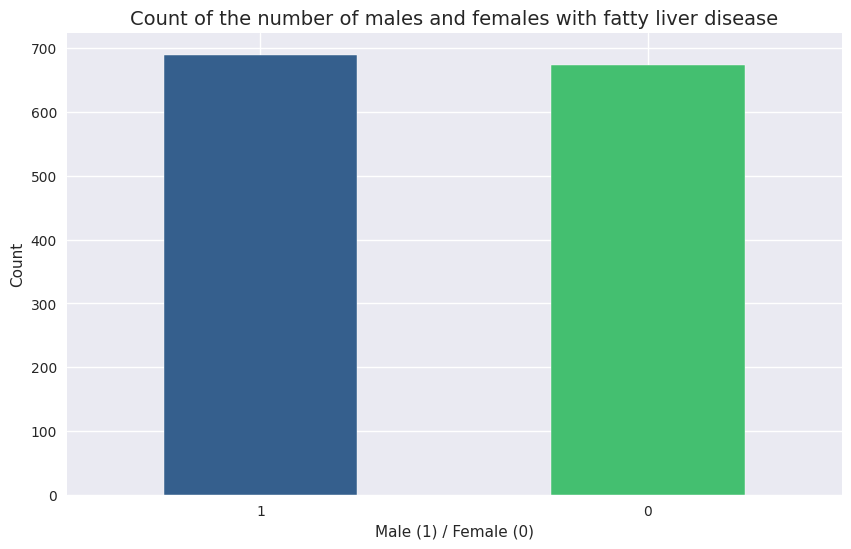

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar a paleta de cores Viridis
colormap = plt.cm.viridis

# Criar o gráfico de barras para "male" filtrando por "status == 1"
df.male[df.status == 1].value_counts().plot(
    kind='bar',
    figsize=(10, 6),
    color=[colormap(0.3), colormap(0.7)]  # Aplicar cores da paleta Viridis
)

# Configurar o título e os rótulos
plt.title("Count of the number of males and females with fatty liver disease", fontsize=14)
plt.xticks(rotation=0)  # Deixar os rótulos no eixo X alinhados horizontalmente
plt.ylabel("Count")  # Rótulo do eixo Y
plt.xlabel("Male (1) / Female (0)")  # Rótulo do eixo X

# Exibir o gráfico
plt.show()

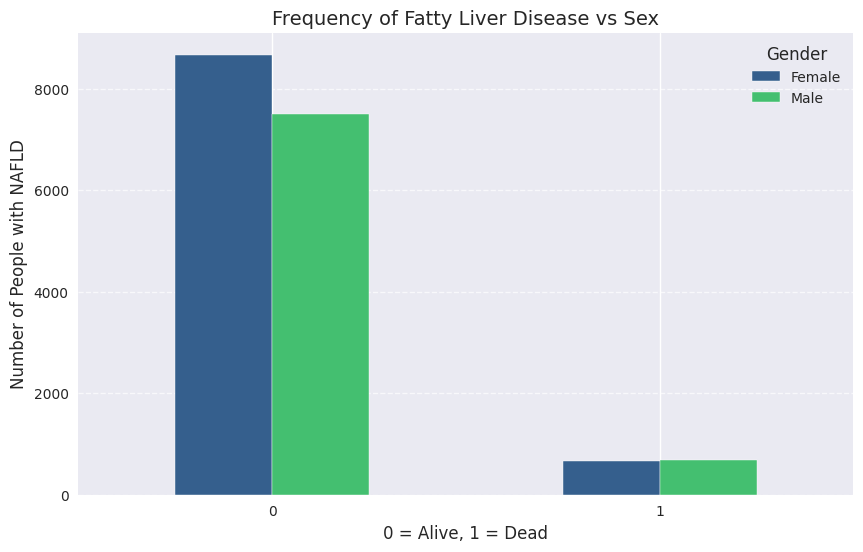

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar a paleta de cores Viridis
colormap = plt.cm.viridis

# Criar gráfico de barras usando pd.crosstab
pd.crosstab(df.status, df.male).plot(
    kind='bar',
    figsize=(10, 6),
    color=[colormap(0.3), colormap(0.7)]  # Aplicar a paleta Viridis
)

# Personalizar título e rótulos
plt.title("Frequency of Fatty Liver Disease vs Sex", fontsize=14)
plt.xlabel("0 = Alive, 1 = Dead", fontsize=12)
plt.ylabel("Number of People with NAFLD", fontsize=12)
plt.legend(["Female", "Male"], title="Gender")
plt.xticks(rotation=0)  # Manter rótulos no eixo X na horizontal
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adicionar grade discreta no eixo Y

# Exibir o gráfico
plt.show()

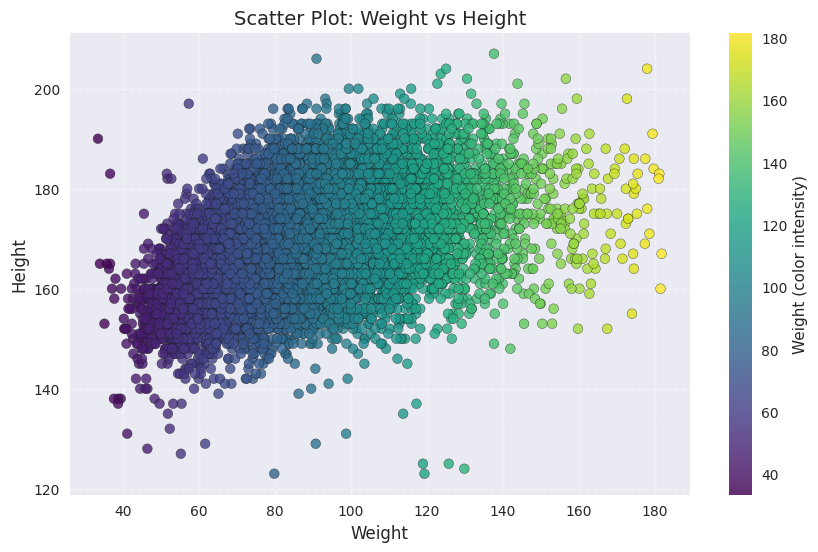

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Criar o gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(df['weight'], df['height'], c=df['weight'], cmap='viridis', edgecolor='k', alpha=0.8)

# Configurar título e rótulos
plt.title("Scatter Plot: Weight vs Height", fontsize=14)
plt.xlabel("Weight", fontsize=12)
plt.ylabel("Height", fontsize=12)
plt.colorbar(label="Weight (color intensity)")  # Barra de cores para referência

# Ajustar o layout e exibir o gráfico
plt.grid(alpha=0.5, linestyle='--')  # Adicionar grade sutil para facilitar a leitura
plt.show()

Definir a opção alfa como 0,1 facilita a visualização dos locais onde há alta densidade de pontos de dados.

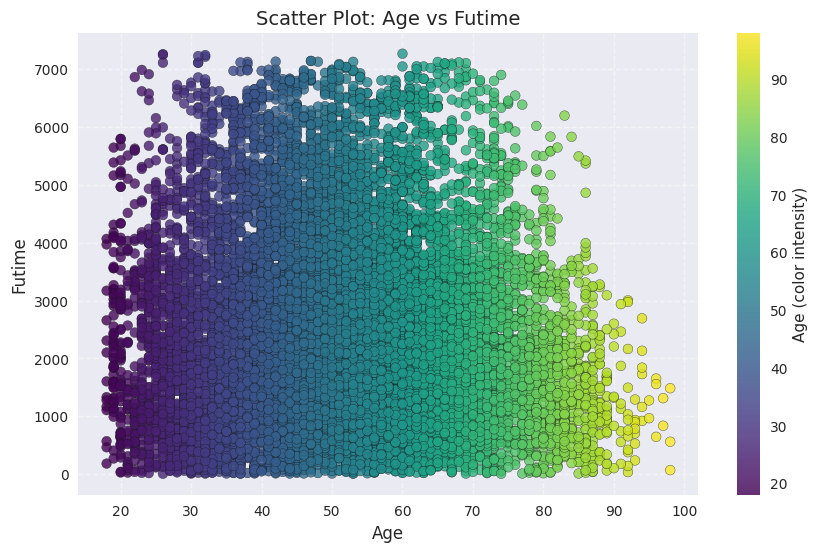

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Criar o gráfico de dispersão com a paleta Viridis
plt.figure(figsize=(10, 6))
plt.scatter(df['age'], df['futime'], c=df['age'], cmap='viridis', edgecolor='k', alpha=0.8)

# Configurar título e rótulos
plt.title("Scatter Plot: Age vs Futime", fontsize=14)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Futime", fontsize=12)
plt.colorbar(label="Age (color intensity)")  # Barra de cores para referência

# Grade sutil para melhorar a leitura
plt.grid(alpha=0.5, linestyle='--')

# Exibir o gráfico
plt.show()

Construindo uma matriz de correlação

In [29]:
df.corr()

,Unnamed: 0,id,age,male,weight,height,bmi,case.id,futime,status
Unnamed: 0,1.000000,-0.009916,-0.288309,0.014677,-0.043366,0.024988,-0.061889,0.005432,-0.215062,-0.122244
id,-0.009916,1.000000,-0.004537,-0.000168,0.007619,-0.006990,0.013306,0.206172,-0.011091,-0.005619
age,-0.288309,-0.004537,1.000000,-0.051238,-0.094175,-0.179095,-0.016555,-0.028272,-0.087784,0.325870
male,0.014677,-0.000168,-0.051238,1.000000,0.343730,0.691512,0.023878,0.011826,-0.020314,0.022427
weight,-0.043366,0.007619,-0.094175,0.343730,1.000000,0.449049,0.874545,0.000476,-0.006841,-0.035718
height,0.024988,-0.006990,-0.179095,0.691512,0.449049,1.000000,-0.024745,0.013001,0.009284,-0.065086
bmi,-0.061889,0.013306,-0.016555,0.023878,0.874545,-0.024745,1.000000,-0.007573,-0.005195,-0.000489
case.id,0.005432,0.206172,-0.028272,0.011826,0.000476,0.013001,-0.007573,1.000000,-0.004949,-0.017782
futime,-0.215062,-0.011091,-0.087784,-0.020314,-0.006841,0.009284,-0.005195,-0.004949,1.000000,-0.069584
status,-0.122244,-0.005619,0.325870,0.022427,-0.035718,-0.065086,-0.000489,-0.017782,-0.069584,1.000000


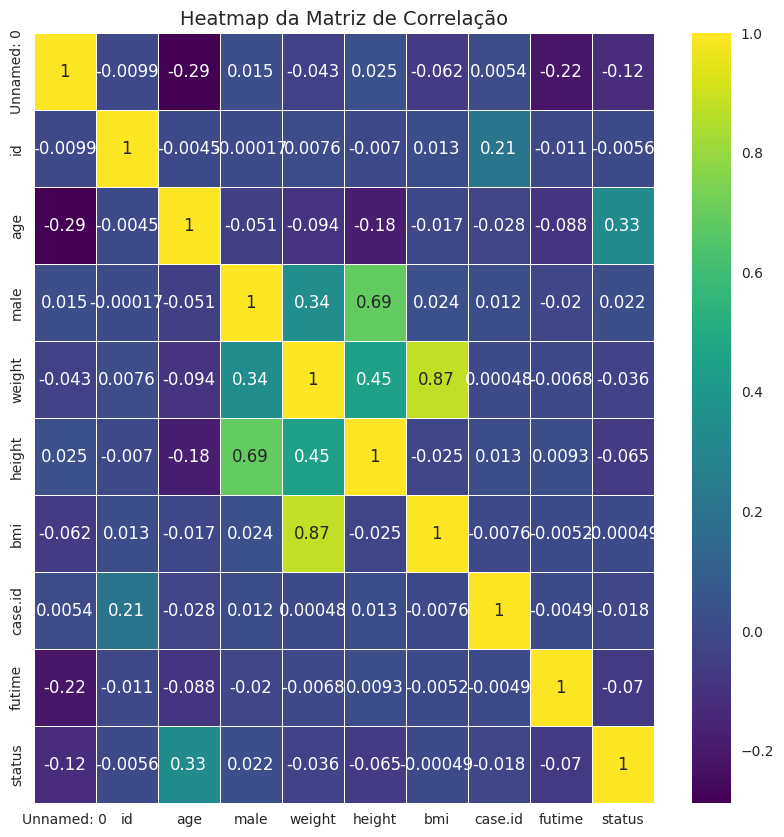

In [31]:
# Calcular a matriz de correlação
corr_matrix = df.corr()

# Criar o heatmap da matriz de correlação com o padrão visual
fig, ax = plt.subplots(figsize=(10, 10)) 
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=.5, 
            ax=ax, 
            cmap="viridis")  # Aplicando a paleta Viridis
plt.title("Heatmap da Matriz de Correlação", fontsize=14)  # Adicionar título ao gráfico
plt.show()

O coeficiente de correlação varia de –1 a 1. Quando está próximo de 1, significa que há uma forte correlação positiva. Por exemplo, o atributo altura tem uma correlação positiva com o atributo masculino.
Quando o coeficiente está próximo de –1, significa que há uma forte correlação negativa.

Preparação de dados

In [ ]:
# fills NA/NaN values
df['height'].fillna(df['height'].median(), inplace=True)


/tmp/ipykernel_22146/296934041.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['weight'].fillna(df['weight'].median(), inplace=True)


In [37]:
# fills NA/NaN values
df['height'].fillna(df['height'].median(), inplace=True)

/tmp/ipykernel_22146/2985517251.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['height'].fillna(df['height'].median(), inplace=True)


In [34]:
print("Valores nulos restantes em 'bmi':", df['bmi'].isna().sum())

Valores nulos restantes em 'bmi': 4961


In [38]:
# fills NA/NaN values
df['bmi'].fillna(df['bmi'].median(), inplace=True)

/tmp/ipykernel_22146/2043828388.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].median(), inplace=True)


In [39]:
# drops columns from the data frame
df.drop('Unnamed: 0', axis=1, inplace=True)
df.tail()

,id,age,male,weight,height,bmi,case.id,futime,status
17544,17562,46,0,53.0,161.0,20.501023,12713.0,1894,0
17545,17563,52,1,111.8,154.0,47.335905,17563.0,3841,0
17546,17564,59,0,57.3,169.0,28.875884,16164.0,5081,0
17547,17565,61,0,83.9,169.0,28.875884,17276.0,3627,1
17548,17566,69,1,94.1,180.0,29.204650,2017.0,2744,0


In [40]:
# drops columns from the data frame
df.drop('case.id', axis=1, inplace=True)
df.tail()

,id,age,male,weight,height,bmi,futime,status
17544,17562,46,0,53.0,161.0,20.501023,1894,0
17545,17563,52,1,111.8,154.0,47.335905,3841,0
17546,17564,59,0,57.3,169.0,28.875884,5081,0
17547,17565,61,0,83.9,169.0,28.875884,3627,1
17548,17566,69,1,94.1,180.0,29.204650,2744,0


In [41]:
# drops columns from the data frame
df.drop('id', axis=1, inplace=True)
df.tail()

,age,male,weight,height,bmi,futime,status
17544,46,0,53.0,161.0,20.501023,1894,0
17545,52,1,111.8,154.0,47.335905,3841,0
17546,59,0,57.3,169.0,28.875884,5081,0
17547,61,0,83.9,169.0,28.875884,3627,1
17548,69,1,94.1,180.0,29.204650,2744,0


In [43]:
!pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 48.2 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 57.7 MB/s eta 0:00:00:00:0100:01


In [44]:
# import StandardScaler
from sklearn.preprocessing import StandardScaler
scal=StandardScaler()
feat=['age', 'male', 'weight', 'height', 'bmi', 'futime']
# fits to data and transforms it
df[feat] = scal.fit_transform(df[feat])
# shows the first five columns of the data frame
df.head()

,age,male,weight,height,bmi,futime,status
0,0.294820,-0.936643,-1.352042,-0.692292,-1.169193,2.447849,0
1,0.974071,-0.936643,-0.804577,-0.147732,-0.805188,-1.135811,0
2,0.023119,1.067643,1.058910,1.812685,0.119228,-0.398990,0
3,0.226894,1.067643,1.243153,0.070092,1.343575,0.465615,0
4,1.041996,1.067643,-0.093925,-0.038820,-0.142628,-0.365296,1


Criando recursos e variáveis ​​de destino

In [45]:
# drop target variable status from the feature set
X = df.drop("status", axis=1).values
Y = df.status.values

Dividindo os dados em conjuntos de treinamento e teste

In [47]:
!pip install imbalanced-learn

In [48]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Define X and y using entire dataset


# Define the desired ratio for the minority class after oversampling
desired_ratio = 0.30

# Define the ratio for undersampling the majority class
undersampling_ratio = 1  # For example, if you want the majority class to be half the size of the minority class

# Define the pipeline
pipeline = Pipeline([
    ('oversample', SMOTE(sampling_strategy=desired_ratio, random_state=42)),
    ('undersample', RandomUnderSampler(sampling_strategy=undersampling_ratio, random_state=42))
    
])

# Apply the pipeline to resample the entire dataset
X_resampled, y_resampled = pipeline.fit_resample(X, Y)

# Split the resampled data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

Crie uma função para avaliar métricas

In [49]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, roc_auc_score, confusion_matrix

def evaluation(Y_test, Y_pred):
    # accuracy classification score
    acc = accuracy_score(Y_test, Y_pred)
    # computes recall
    rcl = recall_score(Y_test, Y_pred)
    # computes f1 score
    f1 = f1_score(Y_test, Y_pred)
    
    metric_dict = {'accuracy': round(acc, 3),
                   'recall': round(rcl, 3),
                   'F1 score': round(f1, 3), 
                  }
    
    return print(metric_dict)

Construindo um modelo
Ajustando e comparando diferentes modelos

In [50]:
np.random.seed(42)
from sklearn.neighbors import KNeighborsClassifier

# Criação e treinamento do classificador
Knn_clf = KNeighborsClassifier()
Knn_clf.fit(X_train, Y_train)

# Predição e avaliação
Knn_Y_pred = Knn_clf.predict(X_test)
Knn_score = Knn_clf.score(X_test, Y_test)

# Exibir o resultado da avaliação
evaluation(Y_test, Knn_Y_pred)

{'accuracy': 0.823, 'recall': 0.898, 'F1 score': 0.832}


In [51]:
np.random.seed(42)
from sklearn.linear_model import LogisticRegression

# Criação e treinamento do classificador de Regressão Logística
LR_clf = LogisticRegression()
LR_clf.fit(X_train, Y_train)

# Predição e avaliação
LR_Y_pred = LR_clf.predict(X_test)
LR_score = LR_clf.score(X_test, Y_test)

# Exibir o resultado da avaliação
evaluation(Y_test, LR_Y_pred)

{'accuracy': 0.761, 'recall': 0.775, 'F1 score': 0.759}


In [52]:
np.random.seed(42)
from sklearn.ensemble import RandomForestClassifier

# Criação e treinamento do classificador Random Forest
RF_clf = RandomForestClassifier(n_estimators=450)
RF_clf.fit(X_train, Y_train)

# Predição e avaliação
RF_score = RF_clf.score(X_test, Y_test)
RF_Y_pred = RF_clf.predict(X_test)

# Exibir o resultado da avaliação
evaluation(Y_test, RF_Y_pred)

{'accuracy': 0.879, 'recall': 0.891, 'F1 score': 0.878}


In [53]:
np.random.seed(42)
from sklearn.svm import SVC

# Criação e treinamento do classificador SVC
SVC_clf = SVC()
SVC_clf.fit(X_train, Y_train)

# Predição e avaliação
SVC_score = SVC_clf.score(X_test, Y_test)
SVC_Y_pred = SVC_clf.predict(X_test)

# Exibir o resultado da avaliação
evaluation(Y_test, SVC_Y_pred)

{'accuracy': 0.772, 'recall': 0.778, 'F1 score': 0.769}


In [54]:
pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.6/223.6 MB 15.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.3/201.3 MB 2.6 MB/s eta 0:00:00:00:0100:01
Note: you may need to restart the kernel to use updated packages.


In [55]:
from xgboost import XGBClassifier

# Criação e treinamento do modelo XGBoost
XGB_clf = XGBClassifier()
XGB_clf.fit(X_train, Y_train)

# Avaliação e predição
XGB_score = XGB_clf.score(X_test, Y_test)
XGB_Y_pred = XGB_clf.predict(X_test)

# Exibir o resultado da avaliação
evaluation(Y_test, XGB_Y_pred)

{'accuracy': 0.867, 'recall': 0.857, 'F1 score': 0.862}


In [58]:
!pip install jinja2

In [59]:
model_comp = pd.DataFrame({'Model': ['Logistic Regression', 'Random Forest',
                                     'K-Nearest Neighbour', 'Support Vector Machine', "XGBoost"], 
                           'Accuracy': [LR_score*100, RF_score*100, Knn_score*100, SVC_score*100, XGB_score*100]})

# Estilizar o DataFrame com gradiente
model_comp.style.background_gradient(cmap="viridis")

,Model,Accuracy
0,Logistic Regression,76.055613
1,Random Forest,87.899073
2,K-Nearest Neighbour,82.337796
3,Support Vector Machine,77.239959
4,XGBoost,86.663234


Olhando para as métricas de avaliação do nosso melhor modelo

In [60]:
print("Best evaluation parameters achieved with SVC:") 
evaluation(Y_test, SVC_Y_pred)

Best evaluation parameters achieved with SVC:
{'accuracy': 0.772, 'recall': 0.778, 'F1 score': 0.769}


In [63]:
!pip install matplotlib

Best evaluation parameters achieved with SVC:
{'accuracy': 0.772, 'recall': 0.778, 'F1 score': 0.769}


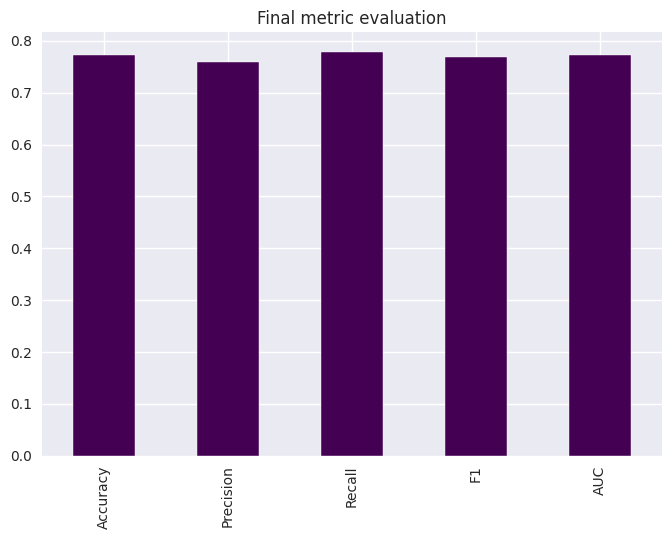

In [65]:
# Importação das bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, roc_auc_score

# Função para avaliação
def evaluation(Y_test, Y_pred):
    # accuracy classification score
    acc = accuracy_score(Y_test, Y_pred)
    # computes recall
    rcl = recall_score(Y_test, Y_pred)
    # computes f1 score
    f1 = f1_score(Y_test, Y_pred)
    
    metric_dict = {'accuracy': round(acc, 3),
                   'recall': round(rcl, 3),
                   'F1 score': round(f1, 3), 
                  }
    
    return print(metric_dict)

# Avaliação final do modelo SVC
print("Best evaluation parameters achieved with SVC:") 
evaluation(Y_test, SVC_Y_pred)

# Criação do DataFrame com as métricas finais
final_metrics = {
    'Accuracy': SVC_clf.score(X_test, Y_test),
    'Precision': precision_score(Y_test, SVC_Y_pred),
    'Recall': recall_score(Y_test, SVC_Y_pred),
    'F1': f1_score(Y_test, SVC_Y_pred),
    'AUC': roc_auc_score(Y_test, SVC_Y_pred)
}

# Organização das métricas em um DataFrame
metrics = pd.DataFrame(final_metrics, index=[0])

# Transposição e plotagem com a paleta 'viridis'
metrics.T.plot.bar(title='Final metric evaluation', legend=False, colormap="viridis")
plt.show()

In [66]:
!pip install seaborn matplotlib

<Figure size 1400x1600 with 0 Axes>

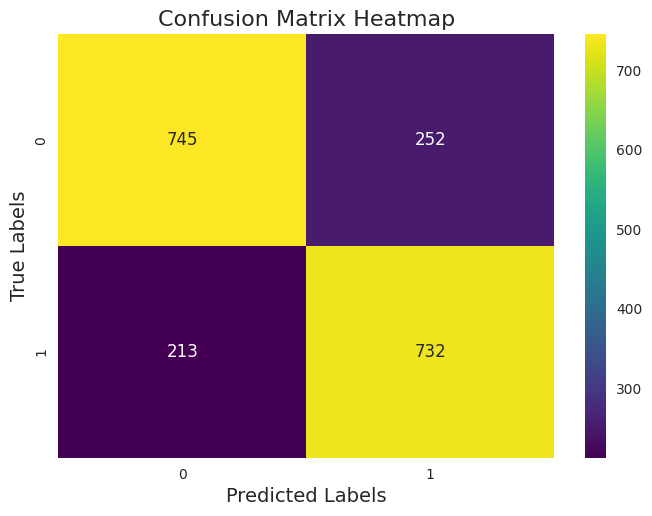

In [67]:
# Importação das bibliotecas necessárias
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Configuração da figura e plotagem do heatmap
plt.figure(figsize=(14, 16))  # Define o tamanho da figura
fig, ax = plt.subplots()

# Plotagem do heatmap da matriz de confusão com a paleta "viridis"
ax = sns.heatmap(confusion_matrix(Y_test, LR_Y_pred), annot=True, cbar=True, fmt="d", cmap="viridis")

# Configuração dos títulos e rótulos
plt.title("Confusion Matrix Heatmap", fontsize=16)  # Título do gráfico
plt.xlabel("Predicted Labels", fontsize=14)        # Rótulo do eixo X
plt.ylabel("True Labels", fontsize=14)            # Rótulo do eixo Y
plt.show()